# **EDA on Crime Dataset in the City of Los Angeles (2020-Present)**

**Firstly, we need to import all the necessary library to do the data analysis and visualization of the dataset. In this project, we will import pandas, numpy,seaborn, matplotlib, datetime and wordcloud.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline     
sns.set(color_codes=True)
from wordcloud import WordCloud, STOPWORDS

**Next, we need to import the dataset needed to be analyzed. Also, the dataset are commonly in csv or excel file type. We can read the dataset according the their file type and store it in the dataframe; df.**

In [ ]:
df = pd.read_csv (r'/content/Crime_Data_from_2020_to_Present.csv')

**Below is to see how the dataframe looks like, we can choose to see only the first few rows of them. Below we only preview the first 8 rows**

In [ ]:
df.head(8)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
5,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
6,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
7,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398


**Then, we can check the datatype for each column in the dataframe.**

In [ ]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

**To check the total of null value in every columns:**

In [ ]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            71425
Vict Age               0
Vict Sex           68378
Vict Descent       68384
Premis Cd              5
Premis Desc          232
Weapon Used Cd    331462
Weapon Desc       331462
Status                 0
Status Desc            0
Crm Cd 1               6
Crm Cd 2          474770
Crm Cd 3          513313
Crm Cd 4          514637
LOCATION               0
Cross Street      426849
LAT                    0
LON                    0
dtype: int64

**Checking the total rows for each data columns.**

In [ ]:
df.count()

DR_NO             514677
Date Rptd         514677
DATE OCC          514677
TIME OCC          514677
AREA              514677
AREA NAME         514677
Rpt Dist No       514677
Part 1-2          514677
Crm Cd            514677
Crm Cd Desc       514677
Mocodes           443252
Vict Age          514677
Vict Sex          446299
Vict Descent      446293
Premis Cd         514672
Premis Desc       514445
Weapon Used Cd    183215
Weapon Desc       183215
Status            514677
Status Desc       514677
Crm Cd 1          514671
Crm Cd 2           39907
Crm Cd 3            1364
Crm Cd 4              40
LOCATION          514677
Cross Street       87828
LAT               514677
LON               514677
dtype: int64

**Then, we format the date reported and occured columns by using date function.**

In [ ]:
try:
    date_reported = [dt.datetime.strptime(d, "%m/%d/%Y %H:%M:%S %p").date() for d in df["Date Rptd"]]
except:
    print("Already converted Date Rptd")
    
try:
    date_occurred = [dt.datetime.strptime(d, "%m/%d/%Y %H:%M:%S %p").date() for d in df["DATE OCC"]]
except:
    print("Already converted DATE OCC")
    
df["Date Rptd"] = np.array(date_reported)
df["DATE OCC"] = np.array(date_occurred)

Already converted Date Rptd


**#1 What are the total crime that is reported in each area in the city of Los Angeles? We can use the line graph to plot the area vs total crimes reported. As a result, we can see that the highest total crime reported is at 77th Street and the lowest is at Foothill.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

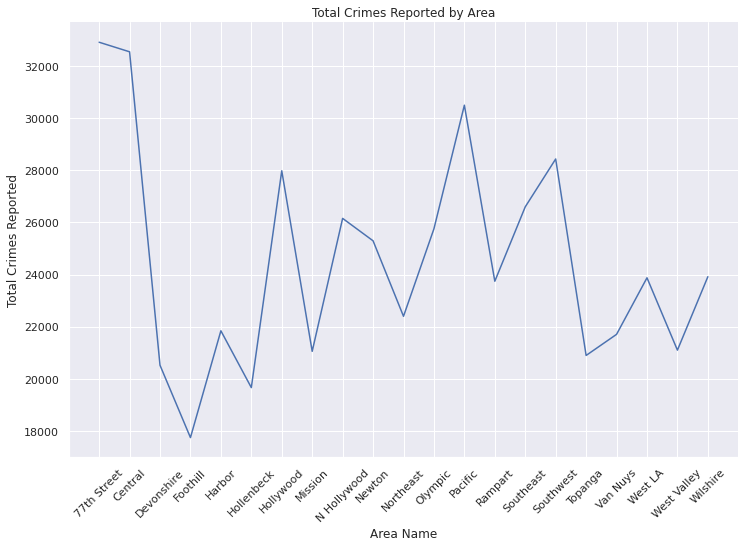

In [ ]:
fig, ax = plt.subplots()
# Plotting crimes reported by year
plt.plot(df["AREA NAME"].value_counts().sort_index().index, df["AREA NAME"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported by Area")
ax.set_xlabel("Area Name")
ax.set_ylabel("Total Crimes Reported")
sns.despine()
plt.xticks(rotation=45)

**#2 Like previous question, this is another way of visualizing the area that have to most crime cases reported. The bigger the size of the "word", the higher the total cases reported. The result is consistent with 77th Street as the most reported crimes.**

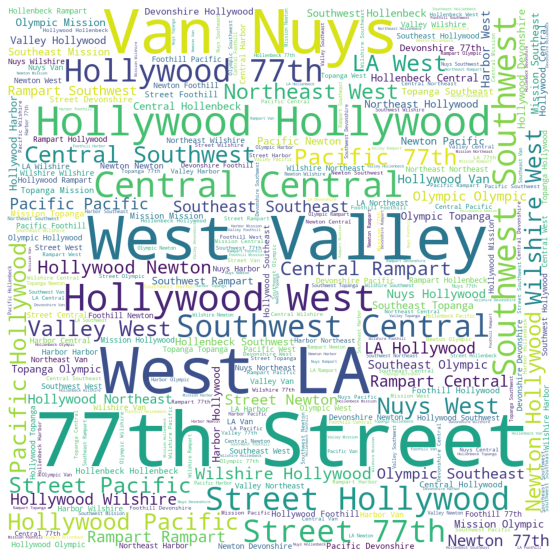

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df['AREA NAME'].dropna()))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

**#3 Next, what is the division male and female among the victims'? From the result, we can see that the division is almost equal in between male and female where they are 48.4% and 42.3% respectively.**

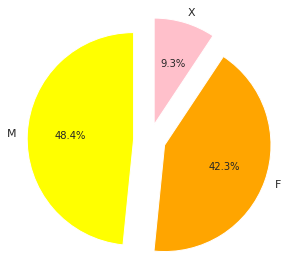

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

ax.pie(df["Vict Sex"].value_counts()[:3],labels=df["Vict Sex"].value_counts()[:3].index, startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("yellow","orange","pink"))
fig.tight_layout()

**#4 Which descent has the highest number in being a victim? From the result, we can see that Hispanic/Latin/Mexican has the highest number with almost 160000 followed by White and Black.**

In [ ]:
#Changing the descent code to a proper wording that can be easily understand
Victims_bg = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
df["Vict Descent"] = df["Vict Descent"].map(Victims_bg)

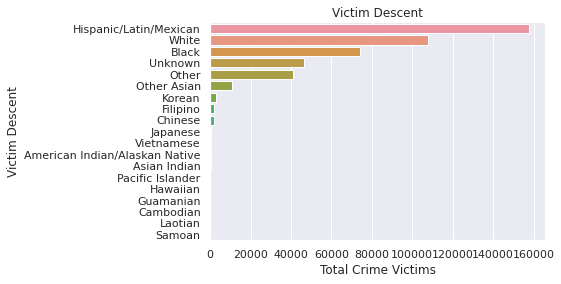

In [ ]:
fig, ax = plt.subplots()
sns.barplot(y=df["Vict Descent"].value_counts().index, x=df["Vict Descent"].value_counts(), ax=ax)
ax.set_title("Victim Descent")
ax.set_xlabel("Total Crime Victims")
ax.set_ylabel("Victim Descent")
sns.despine()

**#5 Which premise that have the highest total number of crime occured? From the figure, we can see that most crimes happened at street with more than 120000 cases occured. (The figure only shows the top 10 premises but we can always change that parameter according to our preference)**

In [ ]:
df["Premis Desc"].value_counts().head(10)

STREET                                          131376
SINGLE FAMILY DWELLING                           85205
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     62021
PARKING LOT                                      37974
OTHER BUSINESS                                   23388
SIDEWALK                                         22966
VEHICLE, PASSENGER/TRUCK                         16446
GARAGE/CARPORT                                   11353
DRIVEWAY                                          9486
RESTAURANT/FAST FOOD                              6486
Name: Premis Desc, dtype: int64

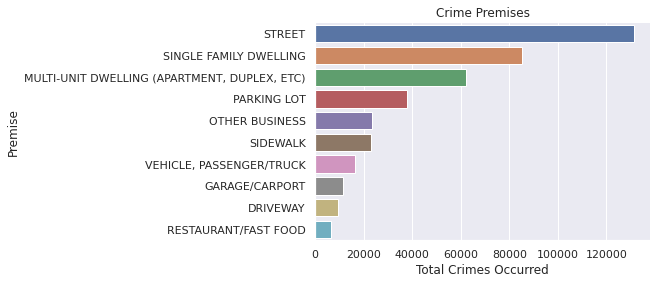

In [ ]:
#for top-10 premise
fig, ax = plt.subplots()

sns.barplot(y=df["Premis Desc"].value_counts().head(10).index,
                 x=df["Premis Desc"].value_counts().head(10), ax=ax)

ax.set_title("Crime Premises")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

**#6 What are the most used weapon during the crime? From the figure, we can see that the most used weapon is strong-arm which is by hands, fist, feet or bodily force. But, there are also measing values for the column = 331462 where we assume that there are no weapon being used or the weapon is not being found at the crime scene.**

In [ ]:
# check for null values
missvals = df["Weapon Desc"].isnull().sum()
print("{} missing values".format(missvals))

331462 missing values


In [ ]:
#top 10 of weapon desc
df["Weapon Desc"].value_counts().head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    97950
UNKNOWN WEAPON/OTHER WEAPON                       18840
VERBAL THREAT                                     13267
HAND GUN                                          11484
SEMI-AUTOMATIC PISTOL                              4334
UNKNOWN FIREARM                                    3889
KNIFE WITH BLADE 6INCHES OR LESS                   3859
OTHER KNIFE                                        3210
MACE/PEPPER SPRAY                                  1968
VEHICLE                                            1879
Name: Weapon Desc, dtype: int64

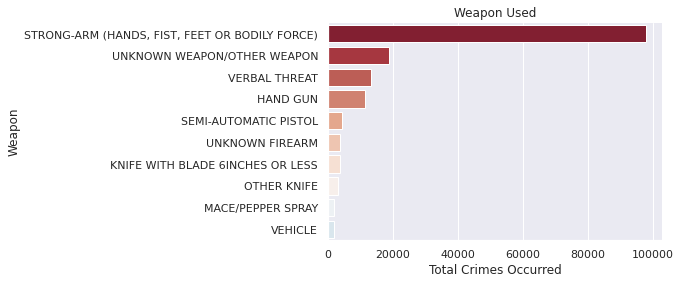

In [ ]:
fig, ax = plt.subplots()

sns.barplot(y=df["Weapon Desc"].value_counts().head(10).index,
                 x=df["Weapon Desc"].value_counts().head(10), ax=ax)

ax.set_title("Weapon Used")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Weapon")
sns.despine()
sns.set_palette("RdPu", n_colors=16)

**#7 For all crimes, what is the arrest status? From the bar graph, we can see most of the arrest status are still in investigation followed by adult other, adult arrest and juve arrest.**

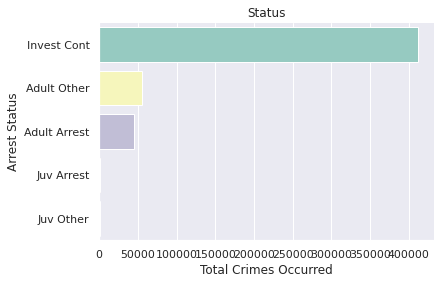

In [ ]:
fig, ax = plt.subplots()
sns.set_palette("Set3", n_colors=16)
sns.barplot(y=df["Status Desc"].value_counts().index,
                 x=df["Status Desc"].value_counts(), ax=ax)

ax.set_title("Status")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Arrest Status")
sns.despine()

**#8 What are the top 5 crimes that happen at the top 5 premises? From the figure, we can analyze it to see many perspective. For example, vehicle stolen happen more at the street as compared to parking lot. Other than that, burglary happen mostly at single family dwelling as compared to other premises/places.**

In [ ]:
#top 5
df["Public Premise"] = df["Premis Desc"][(df["Premis Desc"] == "STREET") |
                                                       (df["Premis Desc"] == "SINGLE FAMILY DWELLING") | 
                                                       (df["Premis Desc"] == "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)") |
                                                       (df["Premis Desc"] == "PARKING LOT") |
                                                       (df["Premis Desc"] == "SIDEWALK")]

In [ ]:
#top 5 of crime
crimetoptype = df["Crm Cd Desc"].value_counts().head(5).index
crimepremtype = df.loc[df["Crm Cd Desc"].isin(crimetoptype)]



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


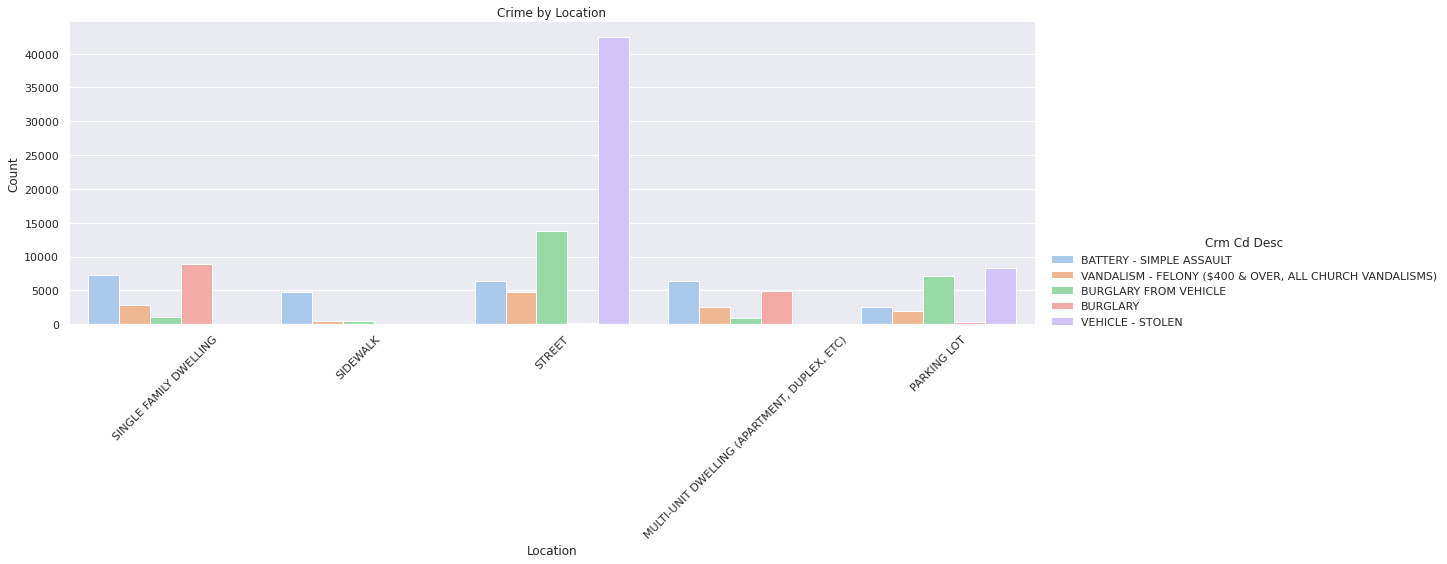

In [ ]:

sns.set_palette("pastel", n_colors=16)
ax = sns.factorplot(x="Public Premise", hue="Crm Cd Desc", kind="count", data=crimepremtype, size=5, aspect=3)

plt.title("Crime by Location")
ax.set_xticklabels(rotation=45)
ax.set_xlabels("Location")
ax.set_ylabels("Count")
sns.despine()

**#9 Lastly, what is the 10 most occured crime in the city of LA? Form the pie chart, we can see that 17.2% of the total reported crimes are vehicle-stolen. From this infrormation, people in LA can take extra precautions in making sure their vehicle is safe. The next most occured crime is followed by Battery-simple assault, burglary from vehicle and so on.**

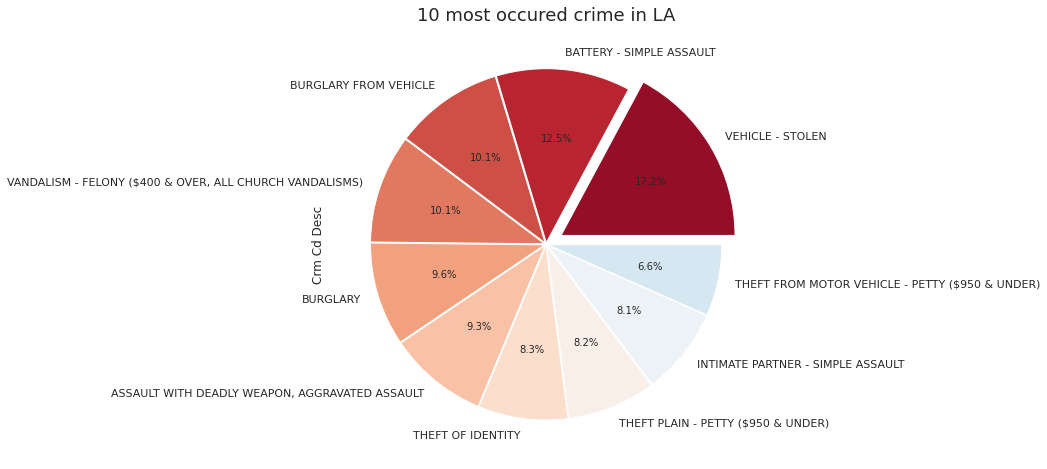

In [ ]:
df["Crm Cd Desc"].value_counts()[:10].plot.pie(figsize=(12,8),explode=(0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01),autopct="%1.1f%%")
plt.title("10 most occured crime in LA",fontsize=18)
plt.show()
sns.set_palette("RdBu", 10)


# **References:**

1) Codecademy. (2022). Seaborn Styling, Part 2: Color. Codecademy; Codecademy. https://www.codecademy.com/article/seaborn-design-ii

‌2) Police, A. (2020, February 10). Crime Data from 2020 to Present. Lacity.org. https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

3) mlislove. (2021, October 23). EDA4LACrimes. Kaggle.com; Kaggle. https://www.kaggle.com/code/mlislove/eda4lacrimes

‌4) sugandhkhobragade. (2020, June 18). EDA of Murders in India. Kaggle.com; Kaggle. https://www.kaggle.com/code/sugandhkhobragade/eda-of-murders-in-india

‌5) ahmedaffan789. (2021, October 22). Los Angeles Crime EDA. Kaggle.com; Kaggle. https://www.kaggle.com/code/ahmedaffan789/los-angeles-crime-eda/data

‌6) wosaku. (2017, August 13). EDA of Crime in Vancouver (2003-2017). Kaggle.com; Kaggle. https://www.kaggle.com/code/wosaku/eda-of-crime-in-vancouver-2003-2017
‌